In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('telcom_data.xlsx')

In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

### Task 1.1: Aggregate user behavior information:

#### Group the data by user and calculate the following metrics: number of xDR sessions, session duration, total download and upload data, and total data volume for each application.
#### Create a new DataFrame with the aggregated information.

In [5]:
user_behavior = df.groupby('Bearer Id').agg({
    'Dur. (ms)': 'count',
    'Start ms': 'min',
    'End ms': 'max',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)' : 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the resulting user behavior dataframe
print(user_behavior)







                   Bearer Id  Dur. (ms)  Start ms  End ms  Total DL (Bytes)  \
0        6917537518543529984          1     730.0   593.0      5.007220e+08   
1        6917537604825860096          1     833.0   699.0      7.095493e+08   
2        6917537608536819712          1     411.0   385.0      8.544659e+08   
3        6917537633966310400          1     833.0   486.0      8.257865e+08   
4        6917537638622189568          1       3.0    89.0      6.249578e+08   
...                      ...        ...       ...     ...               ...   
134704  13186541164985800704          1      72.0   962.0      3.870016e+08   
134705  13186541166737199104          1     986.0   950.0      8.726888e+08   
134706  13186541166776899584          1     368.0   286.0      3.863551e+08   
134707  13186541167134199808          1     211.0   571.0      3.272128e+08   
134708                              990       1.0   999.0      4.433009e+11   

        Total UL (Bytes)  Social Media DL (Bytes)  

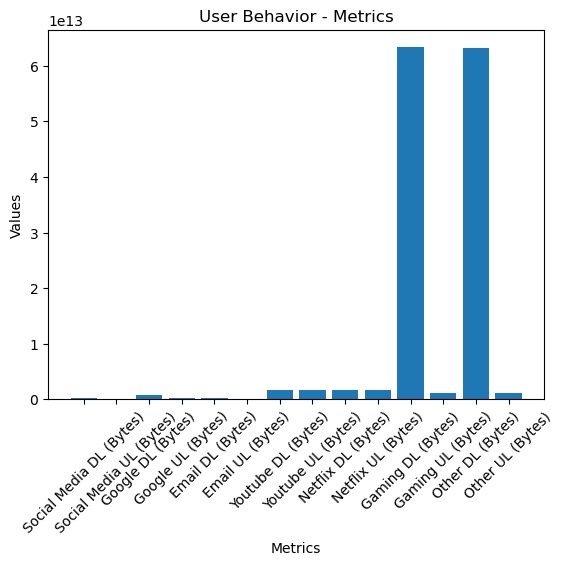

In [6]:
# Select the columns for box plot
Bar_metrics= [
"Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)" ]

values = user_behavior[Bar_metrics].sum()

# Create the bar chart
plt.bar(Bar_metrics, values)

# Set the plot title
plt.title('User Behavior - Metrics')

# Set the x-axis label
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Values')

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


In [7]:
#Task 1.2: Exploratory data analysis
# Handle missing values
user_behavior.fillna(user_behavior.mean(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12176\3369398033.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_behavior.fillna(user_behavior.mean(), inplace=True)


In [8]:

# Analyze basic metrics
metrics = ['Dur. (ms)','Start ms', 'End ms','Total DL (Bytes)', 'Total UL (Bytes)']
basic_stats = user_behavior[metrics].describe()
print(basic_stats)




           Dur. (ms)       Start ms         End ms  Total DL (Bytes)  \
count  134709.000000  134709.000000  134709.000000      1.347090e+05   
mean        1.113511     484.134341     513.277049      5.062506e+08   
std         2.721729     288.763757     287.994948      1.245762e+09   
min         1.000000       0.000000       0.000000      8.827082e+06   
25%         1.000000     233.000000     267.000000      2.614762e+08   
50%         1.000000     477.000000     521.000000      4.877186e+08   
75%         1.000000     732.000000     765.000000      7.064628e+08   
max       990.000000     999.000000     999.000000      4.433009e+11   

       Total UL (Bytes)  
count      1.347090e+05  
mean       4.578893e+07  
std        1.120691e+08  
min        2.866892e+06  
25%        3.407374e+07  
50%        4.252730e+07  
75%        5.177022e+07  
max        4.053185e+10  


In [9]:
# Non-Graphical Univariate Analysis
dispersion_params = user_behavior[metrics].std()
print(dispersion_params)


Dur. (ms)           2.721729e+00
Start ms            2.887638e+02
End ms              2.879949e+02
Total DL (Bytes)    1.245762e+09
Total UL (Bytes)    1.120691e+08
dtype: float64


array([[<Axes: title={'center': 'Dur. (ms)'}>,
        <Axes: title={'center': 'Start ms'}>],
       [<Axes: title={'center': 'End ms'}>,
        <Axes: title={'center': 'Total DL (Bytes)'}>],
       [<Axes: title={'center': 'Total UL (Bytes)'}>, <Axes: >]],
      dtype=object)

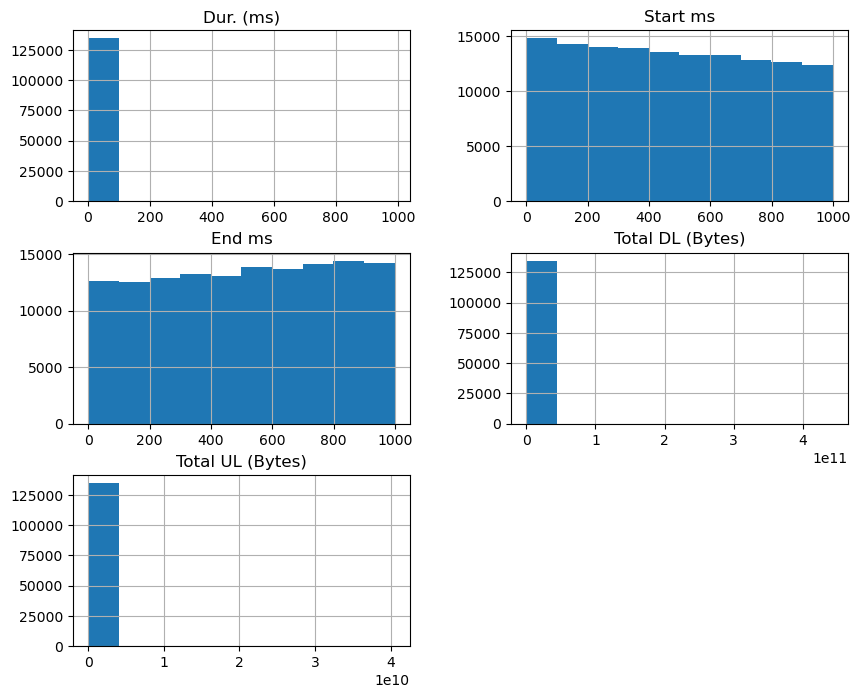

In [10]:

# Graphical Univariate Analysis
user_behavior.hist(column=metrics, bins=10, figsize=(10, 8))



In [11]:
# Bivariate Analysis
corr_matrix = user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]].corr()
print(corr_matrix)



                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                 0.953601   
Social Media UL (Bytes)                 0.953601                 1.000000   
Google DL (Bytes)                       0.952435                 0.952555   
Google UL (Bytes)                       0.953025                 0.953107   
Email DL (Bytes)                        0.953717                 0.953753   
Email UL (Bytes)                        0.952224                 0.952336   
Youtube DL (Bytes)                      0.953731                 0.953734   
Youtube UL (Bytes)                      0.953007                 0.952907   
Netflix DL (Bytes)                      0.953433                 0.953681   
Netflix UL (Bytes)                      0.952625                 0.952399   
Gaming DL (Bytes)                       0.952401                 0.952347   
Gaming UL (Bytes)                       0.952089                 0.951957   

In [13]:

# Define the bins and labels for variable transformation
bins = [0, 500, 1000, 1500, 2000, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column based on the bins and labels
user_behavior['Data Usage Category'] = pd.cut(user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)'],
                                             bins=bins,
                                             labels=labels)

# Compute the total data usage per category
data_usage_per_category = user_behavior.groupby('Data Usage Category')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()

# Print the results
print(data_usage_per_category)



                     Total DL (Bytes)  Total UL (Bytes)
Data Usage Category                                    
Very Low                 0.000000e+00      0.000000e+00
Low                      0.000000e+00      0.000000e+00
Medium                   0.000000e+00      0.000000e+00
High                     0.000000e+00      0.000000e+00
Very High                6.819651e+13      6.168181e+12


C:\Users\Admin\AppData\Local\Temp\ipykernel_12176\184532635.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_usage_per_category = user_behavior.groupby('Data Usage Category')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()


In [14]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(principal_df.head())

            PC1           PC2
0  1.397223e+08  1.454846e+08
1  1.667373e+08 -1.206009e+08
2  2.509305e+08 -2.459902e+08
3 -7.730007e+07 -5.515259e+08
4  2.329907e+08  7.240886e+07


Variance Explained by PC1: 0.9754649299732892
Variance Explained by PC2: 0.02439202831101353


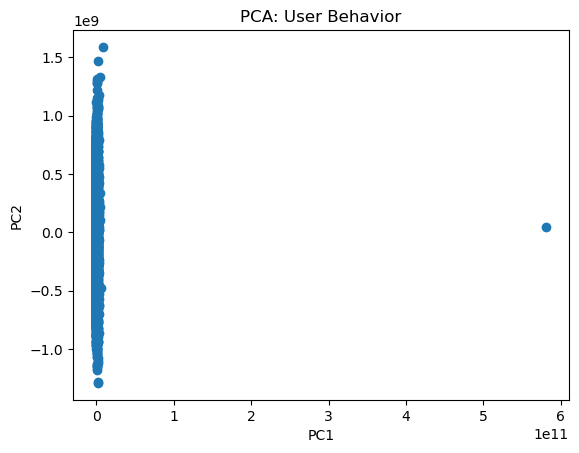

In [23]:
# Create DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by PC1:", explained_variance[0])
print("Variance Explained by PC2:", explained_variance[1])

# Scatter plot of principal components
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: User Behavior')
plt.show()
